<center> 
<img src="https://scontent.xx.fbcdn.net/v/t1.15752-9/268445948_1539402106418218_5934548637776862378_n.png?_nc_cat=110&ccb=1-5&_nc_sid=aee45a&_nc_ohc=2MgjXUEFY30AX-eC0SG&_nc_ad=z-m&_nc_cid=0&_nc_ht=scontent.xx&oh=03_AVJDL58MXXsv1KwlBdJ-Ag_SD3b6WAivMfLCjEIDHQPaIA&oe=61E501D8" >

<!-- ![](https://scontent.fsgn3-1.fna.fbcdn.net/v/t1.6435-9/132706809_2932119663557074_606104806870053595_n.jpg?_nc_cat=104&ccb=1-5&_nc_sid=e3f864&_nc_ohc=zA_6Mk-TxMcAX_dUF-f&_nc_ht=scontent.fsgn3-1.fna&oh=00_AT9cyhjnJep8nTBclIzEWXpVevj5way3qygCB9fLC6OA2Q&oe=61E621CE) -->

Thông tin cá nhân: Sinh viên Đại học Khoa học Tự Nhiên - ĐHQG HCM

Họ và tên: Nguyễn Minh Trí

Mã số: AIC2021 - SV185

Các thông tin khác (nếu có): 
SĐT: 0911271505
Email: contact@minhtringuyennn.com

# <center> **KIỂM TRA** </center>

---

# Đề bài

Thời gian làm bài: 30 phút

Cho trước tập dữ liệu *'[Churn_Modelling.csv](https://drive.google.com/file/d/1LfYY5Fkfrowc1me_zxHqoUiKwEyBO2X6/view?usp=sharing)'* thể hiện quyết định của người dùng sẽ **đóng tài khoản** hoặc **tiếp tục duy trì việc sử dụng tài khoản ngân hàng** dựa trên các thông tin của người dùng đó.

Yêu cầu:
1. Khởi tạo và huấn luyện mô hình mạng nơ-ron nhân tạo (ANN).
2. Sử dụng mô hình đã huấn luyện để dự đoán trên một điểm dữ liệu mới bất kì, và tính độ chính xác accuracy của mô hình trên tập kiểm tra Test set. <br>

Cách làm: Thêm các dòng code, đoạn code cần thiết vào các vị trí có kí hiệu # INSERT YOUR CODE

Link nộp bài: <sẽ cập nhật sớm>

Format tên nộp: [<mã số]_Họ_tên_Basic_AI_vi.ipynb

# Bài làm

## Khai báo thư viện

In [ ]:
# hãy khai báo các thư viện mà bạn thấy cần thiết
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

## Bước 1: Đọc dữ liệu

In [ ]:
# tải xuống tập dữ liệu Churn_Modelling
!gdown --id 1LfYY5Fkfrowc1me_zxHqoUiKwEyBO2X6

# đọc dữ liệu từ file 'Churn_Modelling.csv'
dataset = pd.read_csv("/content/Churn_Modelling.csv")

dataset.shape
dataset.columns

Downloading...
From: https://drive.google.com/uc?id=1LfYY5Fkfrowc1me_zxHqoUiKwEyBO2X6
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 37.2MB/s]


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Câu hỏi: Bạn có nhận xét gì về tập dữ liệu này? <br>

Trả lời: <Thêm câu trả lời của bạn ở đây>

. Tập dữ liệu có 10000 khách hàng và 14 thuộc tính về khách hàng (thông tin cá nhân, sản phẩm họ đang sử dụng)

. Có một số cột không cần thiết như RowNumber, 2 trường dữ liệu không cần cho việc học máy như CustomerId và Surname

. Credit score trải dài từ 350 đến 850 theo phân phối chuẩn

. Khách hàng tập trung ở các nước Châu Âu

. Tuổi khách hàng chiếm đa số < 60, với độ tuổi từ 30 - 40 chiếm tỉ trọng cao nhất.

Phân tích/Trực quan hóa một số thuộc tính của dữ liệu

In [ ]:
# đếm số lượng mẫu của các phân lớp
dataset['CreditScore'].value_counts()
dataset['Age'].value_counts()


37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

<function matplotlib.pyplot.show>

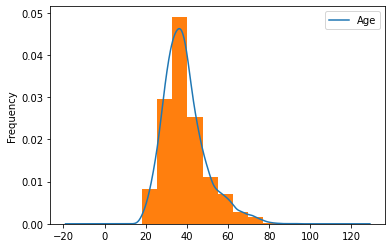

In [ ]:
# trực quan hóa phân bố của thuộc tính "Age"
fig, ax = plt.subplots()
dataset['Age'].plot.kde(ax = ax, legend = True)
dataset['Age'].plot.hist(density=True, ax=ax)
plt.show

<function matplotlib.pyplot.show>

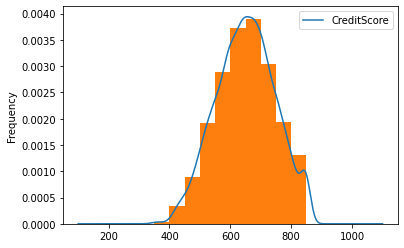

In [ ]:
# trực quan hóa phân bố của thuộc tính "CreditScore"
fig, ax = plt.subplots()
dataset['CreditScore'].plot.kde(ax = ax, legend = True)
dataset['CreditScore'].plot.hist(density=True, ax=ax)
plt.show

## Bước 2: Tiền xử lí dữ liệu

Phân chia dữ liệu thành tập huấn luyện Training set và tập kiểm tra Test set

In [ ]:
from sklearn.model_selection import train_test_split

# khai báo các thuộc tính của điểm dữ liệu
# có thể bỏ các thuộc tính không cần thiết như Số dòng, Mã Khách hàng, ID khách hàng

X = dataset.iloc[:, 3:13].values

# khai báo nhãn của điểm dữ liệu
y = dataset.iloc[:, 13].values

print("x: ", X)
print("y:", y)


x:  [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y: [1 0 1 ... 1 1 0]


Mã hóa các dữ liệu "non-numerical"

In [ ]:
from sklearn.preprocessing import LabelEncoder

# mã hóa thuộc tính "Gender"
# gợi ý sử dụng LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()

# fit_transform các giá trị vừa được mã hóa
X[:, 1] = le1.fit_transform(X[:, 1])
X[:, 2] = le2.fit_transform(X[:, 2])


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# mã hóa thuộc tính "Geography"
# gợi ý sử dụng ColumnTransformer(), OneHotEncoder
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],
    remainder='passthrough'
)

# fit_transform các thuộc tính
X = np.array(ct.fit_transform(X))
X = X[:, 1:]

Phân chia dữ liệu theo tỉ lệ 8:2 cho huấn luyện và kiểm tra

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler

# chuẩn hóa dữ liệu với Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Bước 3: Áp dụng mô hình phân loại ANN

Thiết kế mô hình ANN

In [ ]:
# khởi tạo với keras.models.Sequential()
ann = Sequential()

# thêm lớp input và lớp ẩn đầu tiên với 6 unit, hàm kích hoạt là ReLU
ann.add(Dense(units = 6, activation = 'relu', input_dim = 11))

# thêm lớp ẩn thứ hai với 6 unit, hàm kích hoạt là ReLU
ann.add(Dense(units = 6, activation = 'relu'))

# thêm lớp output với hàm kích hoạt là sigmoid
ann.add(Dense(units = 1, activation = 'sigmoid'))

Biên dịch mô hình

In [ ]:
# biên dịch mô hình sử dụng hàm tối ưu Adam, hàm độ lỗi binary cross_entropy, độ đo đánh giá là accuracy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

Huấn luyện mô hình


In [ ]:
# huấn luyện mô hình với batch size là 32, huấn luyện với 150 epoch
ann.fit(x=X_train, y=y_train, batch_size = 32, epochs = 150)

Epoch 1/150
250/250 [==============================] - 1s 1ms/step - loss: 0.6443 - accuracy: 0.6747
Epoch 2/150
250/250 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.8000
Epoch 3/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.8030
Epoch 4/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8075
Epoch 5/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8121
Epoch 6/150
250/250 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8158
Epoch 7/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8261
Epoch 8/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8372
Epoch 9/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8454
Epoch 10/150
250/250 [==============================] - 0s 2ms/step - loss: 0.3660 - accura

## Bước 4: Dự đoán kết quả và đánh giá mô hình

Dự đoán một điểm dữ liệu mới với các thông tin sau:
Liệu người dùng này sẽ tiếp tục hay đóng tài khoản ngân hàng?

1. Geography: France

2. Credit Score: 600

3. Gender: Male

4. Age: 40 years old

5. Tenure: 3 years

6. Balance: $ 60000

7. Number of Products: 2

8. Does this customer have a credit card ? Yes

9. Is this customer an Active Member: Yes

10. Estimated Salary: $ 50000

In [ ]:
# dự đoán kết quả trên điểm dữ liệu mới, đặt ngưỡng là 0.5
pred = ann.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
pred = (pred > 0.5)
print(pred) # Khách hàng sẽ ở lại

[[False]]


Dự đoán kết quả trên toàn bộ tập kiểm tra

In [ ]:
# dự đoán dữ liệu trên toàn bộ tập kiểm tra với ngưỡng là 0.5
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Thiết lập Confusion Matrix để đánh giá kết quả mô hình

In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1518   77]
 [ 199  206]]


0.862

In [ ]:
# tính độ chính xác với các độ đo: accuracy, precision, recall
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

Text(0.5, 15.0, 'Prediction')

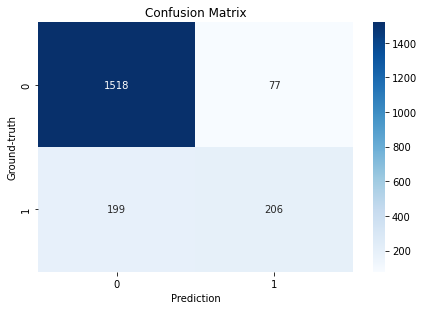

In [ ]:
import seaborn as sns # trực quan hóa dữ liệu

# khởi tạo figure
labels = [0, 1] # 'Exited'
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# tạo confusion matrix và vẽ heatmap
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "Blues" ,fmt = 'g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Ground-truth')
plt.xlabel('Prediction')

## Câu hỏi: Bạn có nhận xét gì về mô hình ANN vừa được huấn luyện?
Trả lời: 

. Ta có thể thấy ô (TN - True negative) số các lần dự đoán khách hàng sẽ ở lại đúng khá nhiều (1518/1595).

. Tuy vậy, mô hình còn nhầm lẫn giữa việc khách hàng có rời hay không rời khỏi ngân hàng (ô FN và ô TP) có kết quả khá sát nhau (199, 206) --> Mô hình hay đưa ra false negative dù người sử dụng đó không còn sử dụng dịch vụ của ngân hàng.

. Có 77 người ở lại ngân hàng nhưng mô hình dự đoán sai.

. Mô hình cần cải thiện TP, giảm FN. Và khi tiếp cận sớm những người trong danh sách FP sẽ cải thiện trải nghiệm người dùng của ngân hàng, gia tăng những người dùng trong tập FP quay trở lại sử dụng ngân hàng.

.Với tỉ lệ dự đoán đúng 83.2%, mô hình còn có khả năng học và phát triển nếu ứng dụng các phương pháp học khác hoặc mô hình khác hiệu quả hơn.

#<center> Chúc các bạn làm bài tốt.
---